In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

# Коэффициенты Стьюдента
student = {
    2: 12.7062047364,
    3: 4.30265272991,
    4: 3.18244630528,
    5: 2.7764451052,
    6: 2.57058183661,
    7: 2.44691184879,
    8: 2.36462425101,
    9: 2.30600413503,
    10: 2.26215716274,
    11: 2.22813885196,
    12: 2.20098516008,
    13: 2.17881282966,
    14: 2.16036865646,
    15: 2.14478668792,
    16: 2.13144954556,
    17: 2.11990529922,
    18: 2.10981557783,
    19: 2.10092204024,
    20: 2.09302405441,
}

## Задание 12

In [2]:
x_i = np.array([0., 1., 3., 5., 6., 9.])
print(f'{x_i=}')
sum_x_i = sum(x_i)
print(f'{sum_x_i=}')
print()

y_i = np.array([-4.99, 4.99, 20.75, 35.75, 44.20, 67.3])
print(f'{y_i=}')
sum_y_i = sum(y_i)
print(f'{sum_y_i=}')
print()

x_i_quad = x_i**2
print(f'{x_i_quad=}')
sum_x_i_quad = sum(x_i_quad)
print(f'{sum_x_i_quad=}')
print()

x_i_y_i = x_i * y_i
print(f'{x_i_y_i=}')
sum_x_i_y_i = sum(x_i_y_i)
print(f'{sum_x_i_y_i=}')
print()

y_i_quad = y_i**2
print(f'{y_i_quad=}')
sum_y_i_quad = sum(y_i_quad)
print(f'{sum_y_i_quad=}')
print()

N = x_i.shape[0]
print(f'{N=}')

x_i=array([0., 1., 3., 5., 6., 9.])
sum_x_i=24.0

y_i=array([-4.99,  4.99, 20.75, 35.75, 44.2 , 67.3 ])
sum_y_i=168.0

x_i_quad=array([ 0.,  1.,  9., 25., 36., 81.])
sum_x_i_quad=152.0

x_i_y_i=array([ -0.  ,   4.99,  62.25, 178.75, 265.2 , 605.7 ])
sum_x_i_y_i=1116.8899999999999

y_i_quad=array([  24.9001,   24.9001,  430.5625, 1278.0625, 1953.64  , 4529.29  ])
sum_y_i_quad=8241.3552

N=6


In [3]:
A = (sum_x_i_quad * sum_y_i - sum_x_i * sum_x_i_y_i) / (N * sum_x_i_quad - sum_x_i ** 2 )
print(f'{A=}')

B = (N * sum_x_i_y_i - sum_x_i * sum_y_i ) / (N * sum_x_i_quad - sum_x_i ** 2 )
print(f'{B=}')

A=-3.7778571428571337
B=7.944464285714283


In [4]:
delta_y_i = y_i - A - B * x_i
print(f'{delta_y_i=}')

delta_y_i_quad = delta_y_i ** 2
print(f'{delta_y_i_quad=}')

sum_delta_y_i_quad = sum(delta_y_i_quad)
print(f'{sum_delta_y_i_quad=}')

delta_y_i=array([-1.21214286,  0.82339286,  0.69446429, -0.19446429,  0.31107143,
       -0.42232143])
delta_y_i_quad=array([1.46929031, 0.6779758 , 0.48228064, 0.03781636, 0.09676543,
       0.17835539])
sum_delta_y_i_quad=2.942483928571434


In [5]:
sigma_y = ((sum_delta_y_i_quad) / (N - 2))**0.5
print(f'{sigma_y=}')

delta_y = student[N - 2] * sigma_y
y_i_errors = np.ones(N) * delta_y
print(f'{delta_y=}')

sigma_y=0.8576834976510033
delta_y=2.729531678199063


In [6]:
sigma_A = sigma_y * ((sum_x_i_quad) / (N * sum_x_i_quad - sum_x_i ** 2))**0.5
print(f'{sigma_A=}')

delta_A = student[N - 2] * sigma_A
print(f'{delta_A=}')

sigma_A=0.5768716672650841
delta_A=1.8358631061084805


In [7]:
sigma_B = sigma_y / (N * sum_x_i_quad - sum_x_i ** 2)**0.5
print(f'{sigma_B=}')

delta_B = student[N - 2] * sigma_B
print(f'{delta_B=}')

sigma_B=0.04679047083690717
delta_B=0.14890816103722682


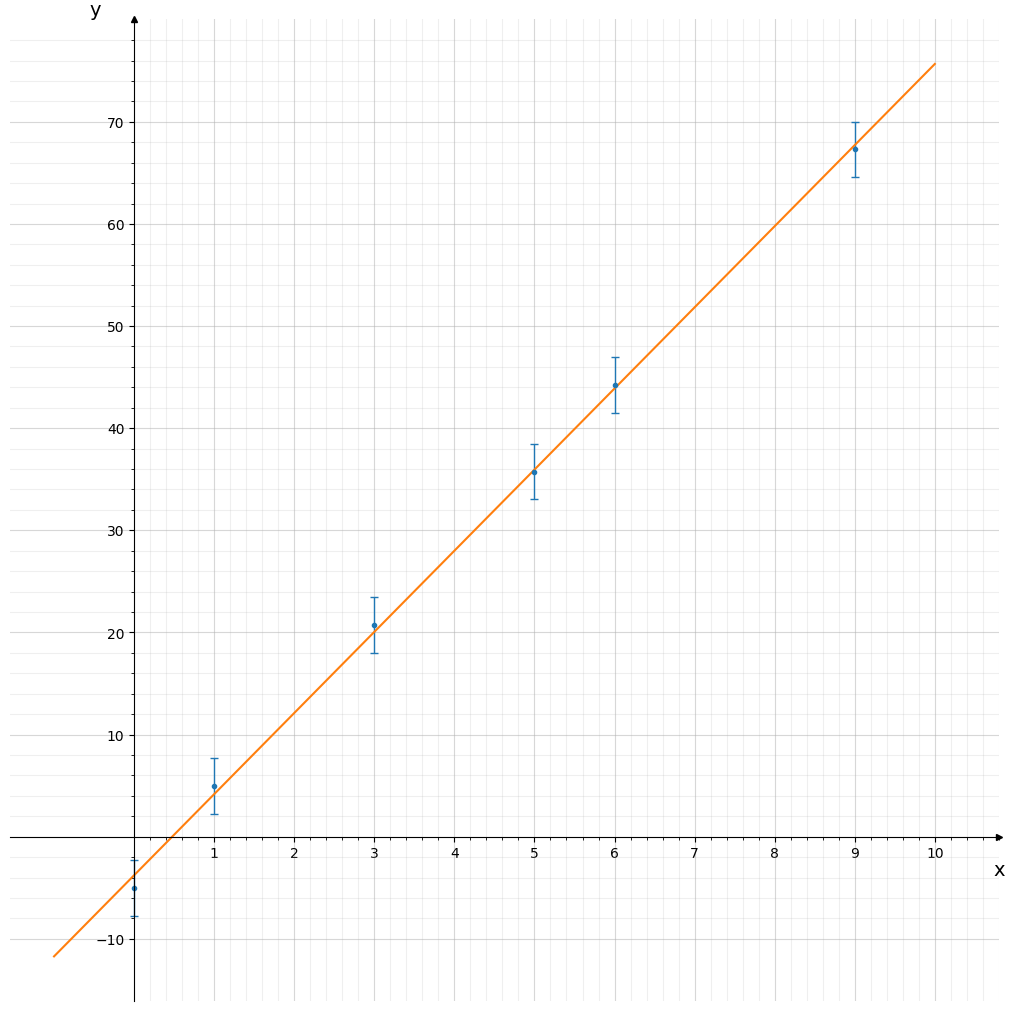

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

ax.errorbar(x_i, y_i, y_i_errors, fmt='.', linewidth=1, capsize=3)

x = np.array([-1., 10.])
y = A + B*x

ax.plot(x, y, label='Теория')


# Рисуем оси
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Рисуем стрелочки
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=0, x=1.)
ax.set_ylabel('y', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 1., 10. 
xmin, xmax, ymin, ymax = 0., 11., -10., 80

x_ticks = np.arange(xmin, xmax, x_frequency)
x_ticks_minor = np.arange(xmin, xmax, x_frequency/5)

y_ticks = np.arange(ymin, ymax, y_frequency)
y_ticks_minor = np.arange(ymin, ymax, y_frequency/5)

ax.set_xticks(x_ticks[x_ticks**2 > 0.005])
ax.set_yticks(y_ticks[y_ticks**2 > 0.005])
ax.set_xticks(x_ticks_minor, minor=True)
ax.set_yticks(y_ticks_minor, minor=True)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


# Отображаем
ax.set_title('')
plt.show()

## Задание 13

In [ ]:
x_i = np.array([0., 1., 2., 3., 4., 5., 6.])
print(f'{x_i=}')
sum_x_i = sum(x_i)
print(f'{sum_x_i=}')
print()

P_i = np.array([760.0, 674.8, 598.0, 528.9, 466.6, 410.6, 360.2])
y_i = np.log10(P_i)
print(f'{y_i=}')
sum_y_i = sum(y_i)
print(f'{sum_y_i=}')
print()

x_i_quad = x_i**2
print(f'{x_i_quad=}')
sum_x_i_quad = sum(x_i_quad)
print(f'{sum_x_i_quad=}')
print()

x_i_y_i = x_i * y_i
print(f'{x_i_y_i=}')
sum_x_i_y_i = sum(x_i_y_i)
print(f'{sum_x_i_y_i=}')
print()

y_i_quad = y_i**2
print(f'{y_i_quad=}')
sum_y_i_quad = sum(y_i_quad)
print(f'{sum_y_i_quad=}')
print()

N = x_i.shape[0]
print(f'{N=}')

In [ ]:
A = (sum_x_i_quad * sum_y_i - sum_x_i * sum_x_i_y_i) / (N * sum_x_i_quad - sum_x_i ** 2 )
print(f'{A=}')

B = (N * sum_x_i_y_i - sum_x_i * sum_y_i ) / (N * sum_x_i_quad - sum_x_i ** 2 )
print(f'{B=}')

In [ ]:
delta_y_i = y_i - A - B * x_i
print(f'{delta_y_i=}')

delta_y_i_quad = delta_y_i ** 2
print(f'{delta_y_i_quad=}')

sum_delta_y_i_quad = sum(delta_y_i_quad)
print(f'{sum_delta_y_i_quad=}')

In [ ]:
sigma_y = ((sum_delta_y_i_quad) / (N - 2))**0.5
print(f'{sigma_y=}')

delta_y = student[N - 2] * sigma_y
y_i_errors = np.ones(N) * delta_y
print(f'{delta_y=}')

In [ ]:
sigma_A = sigma_y * ((sum_x_i_quad) / (N * sum_x_i_quad - sum_x_i ** 2))**0.5
print(f'{sigma_A=}')

delta_A = student[N - 2] * sigma_A
print(f'{delta_A=}')

In [ ]:
sigma_B = sigma_y / (N * sum_x_i_quad - sum_x_i ** 2)**0.5
print(f'{sigma_B=}')

delta_B = student[N - 2] * sigma_B
print(f'{delta_B=}')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

ax.errorbar(x_i, y_i, y_i_errors, fmt='.', linewidth=1, capsize=3)

x = np.array([-1., 7.])
y = A + B*x

ax.plot(x, y, label='Теория')


# Рисуем оси
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
# ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Рисуем стрелочки
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
# ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create ' and 'y' labrfe$y=log_{{10}}s placed at the end of the axes
ax.set_xlabel(rf'x', size=14, labelpad=0, x=1.)
ax.set_ylabel('y', size=14, labelpad=0, y=1., rotation=0)

# Create custom major ticks to determine position of tick labels
x_frequency, y_frequency = 1., 0.1 
xmin, xmax, ymin, ymax = 0., 7., 2.5, 3.
x_ticks = np.arange(xmin, xmax, x_frequency)
y_ticks = np.arange(ymin, ymax, y_frequency)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks[y_ticks**2 > 0.005])


# Отображаем
ax.set_title('')
# ax.legend()
ax.grid(False)